In [24]:
import pandas as pd

df = pd.read_excel('data_penumpang_kapal.xlsx')
df.head()

,tanggal,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,2021-01-01,MUARA ANGKE,16,19,896,1276
1,2021-01-01,HARAPAN,6,2,561,18
2,2021-01-01,KELAPA,2,4,101,96
3,2021-01-01,LANCANG,6,6,93,141
4,2021-01-01,MARINA,3,2,213,121


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tanggal          3650 non-null   datetime64[ns]
 1   pelabuhan        3650 non-null   object        
 2   kapal_berangkat  3650 non-null   int64         
 3   kapal_tiba       3650 non-null   int64         
 4   penumpang_naik   3650 non-null   int64         
 5   penumpang_turun  3650 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 171.2+ KB


In [26]:
df.shape

(3650, 6)

In [27]:
df.describe()

,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,4.432055,4.524932,68.438630,67.807945
std,3.630873,3.865307,129.588954,125.791441
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,11.000000,11.000000
50%,4.000000,4.000000,35.000000,36.000000
75%,6.000000,6.000000,72.000000,77.000000
max,64.000000,64.000000,2172.000000,2347.000000


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
null_data = round(100*(df.isnull().sum())/len(df), 2)
null_data

tanggal            0.0
pelabuhan          0.0
kapal_berangkat    0.0
kapal_tiba         0.0
penumpang_naik     0.0
penumpang_turun    0.0
dtype: float64

In [30]:
total_kb = df.groupby('tanggal')['kapal_berangkat'].sum()
total_kb = total_kb.reset_index()
total_kb.head()

,tanggal,kapal_berangkat
0,2021-01-01,122
1,2021-01-02,120
2,2021-01-03,89
3,2021-01-04,50
4,2021-01-05,48


In [31]:
total_kt = df.groupby('tanggal')['kapal_tiba'].sum()
total_kt = total_kt.reset_index()
total_kt.columns = ['tanggal', 'kapal_tiba']
total_kt.head()

,tanggal,kapal_tiba
0,2021-01-01,118
1,2021-01-02,115
2,2021-01-03,93
3,2021-01-04,53
4,2021-01-05,46


In [32]:
total_pn = df.groupby('tanggal')['penumpang_naik'].sum()
total_pn = total_pn.reset_index()
total_pn.columns = ['tanggal', 'penumpang_naik']
total_pn.head()

,tanggal,penumpang_naik
0,2021-01-01,5246
1,2021-01-02,4574
2,2021-01-03,3271
3,2021-01-04,1201
4,2021-01-05,1288


In [33]:
total_pt = df.groupby('tanggal')['penumpang_turun'].sum()
total_pt = total_pt.reset_index()
total_pt.columns = ['tanggal', 'penumpang_turun']
total_pt.head()

,tanggal,penumpang_turun
0,2021-01-01,4584
1,2021-01-02,4371
2,2021-01-03,3209
3,2021-01-04,1729
4,2021-01-05,914


In [34]:
merge1 = pd.merge(total_kb, total_kt, on='tanggal', how='inner')
merge2 = pd.merge(merge1, total_pn, on='tanggal', how='inner')
data_fix = pd.merge(merge2, total_pt, on='tanggal', how='inner')
data_fix

,tanggal,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,2021-01-01,122,118,5246,4584
1,2021-01-02,120,115,4574,4371
2,2021-01-03,89,93,3271,3209
3,2021-01-04,50,53,1201,1729
4,2021-01-05,48,46,1288,914
...,...,...,...,...,...
360,2021-12-27,51,52,811,1028
361,2021-12-28,46,44,656,714
362,2021-12-29,47,48,754,756
363,2021-12-30,57,64,963,1069


In [35]:
data_df = data_fix[['kapal_berangkat', 'kapal_tiba', 'penumpang_naik', 'penumpang_turun']]
scaler = StandardScaler()
data_df_scaled = scaler.fit_transform(data_df)
data_df_scaled.shape

(365, 4)

In [36]:
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(data_df_scaled)

KMeans(max_iter=50, n_clusters=2)

In [37]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
data_fix['Cluster'] = kmeans.labels_
data_fix

,tanggal,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun,Cluster
0,2021-01-01,122,118,5246,4584,1
1,2021-01-02,120,115,4574,4371,1
2,2021-01-03,89,93,3271,3209,1
3,2021-01-04,50,53,1201,1729,0
4,2021-01-05,48,46,1288,914,0
...,...,...,...,...,...,...
360,2021-12-27,51,52,811,1028,0
361,2021-12-28,46,44,656,714,0
362,2021-12-29,47,48,754,756,0
363,2021-12-30,57,64,963,1069,0


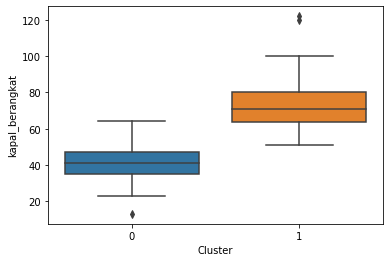

In [39]:
sns.boxplot(x='Cluster', y='kapal_berangkat', data=data_fix)

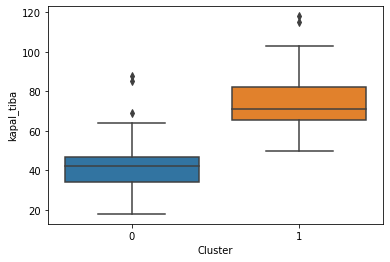

In [40]:
sns.boxplot(x='Cluster', y='kapal_tiba', data=data_fix)

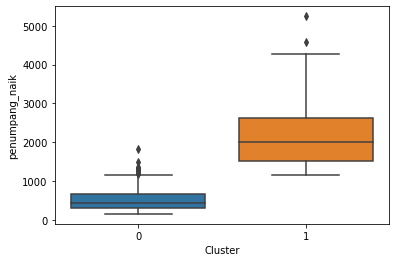

In [41]:
sns.boxplot(x='Cluster', y='penumpang_naik', data=data_fix)

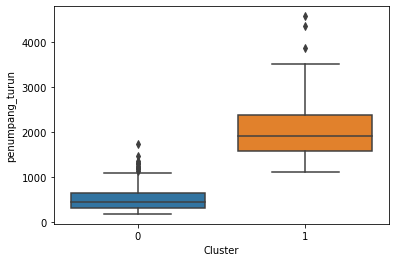

In [42]:
sns.boxplot(x='Cluster', y='penumpang_turun', data=data_fix)

In [43]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.7028036810608705
For n_clusters = 3 The average silhouette_score is : 0.4517046255883325
For n_clusters = 4 The average silhouette_score is : 0.46452713277702884


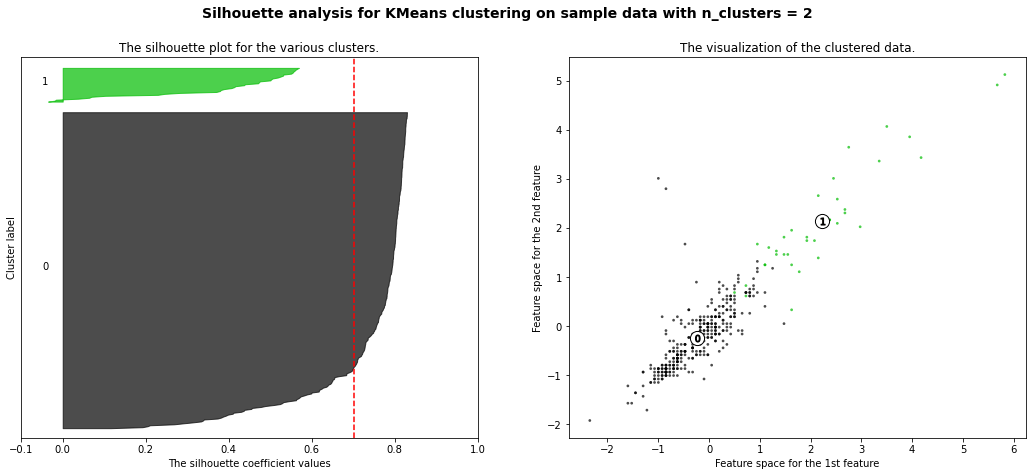

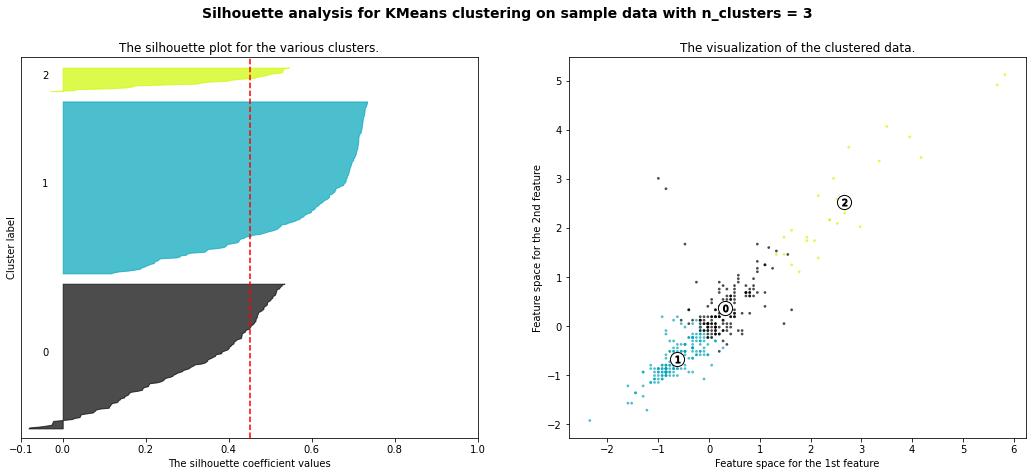

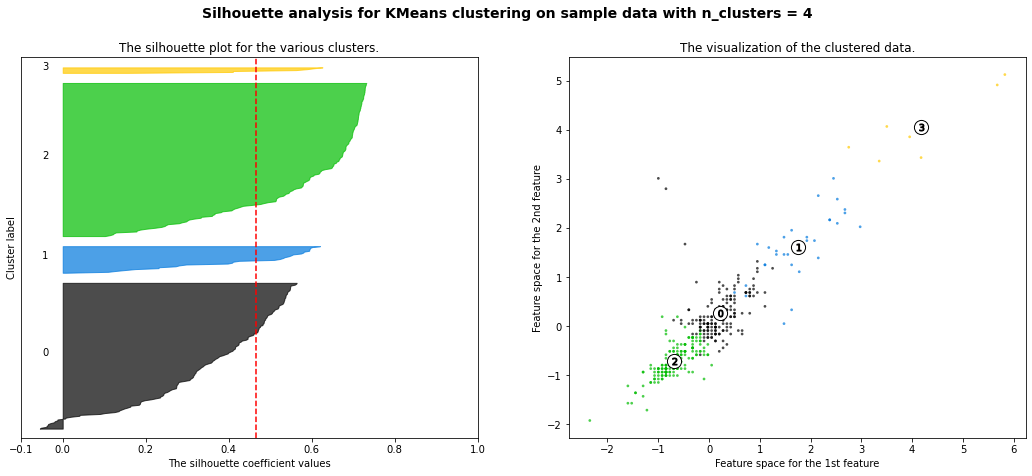

In [44]:
n_cluster = [2, 3, 4]

for n in n_cluster:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_df_scaled) + (n + 1) * 10])

    clusterer = KMeans(n_clusters=n, random_state=10)
    cluster_labels = clusterer.fit_predict(data_df_scaled)

    silhouette_avg = silhouette_score(data_df_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(data_df_scaled, cluster_labels)

    y_lower = 10
    for i in range (n):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    ax2.scatter(
        data_df_scaled[:, 0], data_df_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_

    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n,
        fontsize=14,
        fontweight="bold",
    )

plt.show()




In [45]:
#make week of year column
data_fix['week'] = data_fix['tanggal'].dt.week % 53 + 1

#make month column
data_fix['month'] = data_fix['tanggal'].dt.month

#make total penumpang
data_fix['total_penumpang'] = data_fix['penumpang_naik'] + data_fix['penumpang_turun']
data_fix

,tanggal,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun,Cluster,week,month,total_penumpang
0,2021-01-01,122,118,5246,4584,1,1,1,9830
1,2021-01-02,120,115,4574,4371,1,1,1,8945
2,2021-01-03,89,93,3271,3209,1,1,1,6480
3,2021-01-04,50,53,1201,1729,0,2,1,2930
4,2021-01-05,48,46,1288,914,0,2,1,2202
...,...,...,...,...,...,...,...,...,...
360,2021-12-27,51,52,811,1028,0,53,12,1839
361,2021-12-28,46,44,656,714,0,53,12,1370
362,2021-12-29,47,48,754,756,0,53,12,1510
363,2021-12-30,57,64,963,1069,0,53,12,2032


In [46]:
#describe total penumpang
data_fix['total_penumpang'].describe()

count     365.000000
mean     1362.465753
std      1251.808128
min       351.000000
25%       661.000000
50%      1011.000000
75%      1438.000000
max      9830.000000
Name: total_penumpang, dtype: float64

In [47]:
#define high, normal, and low total penumpang
data_fix['season'] = data_fix['total_penumpang'].apply(lambda x: 'high' if x > 1438 else ('normal' if x > 1011 else 'low'))

In [48]:
#conclusion of week season most frequent
week_rec = data_fix.groupby('week')['season'].agg(pd.Series.mode)

#conclusion of month season most frequent
month_rec = data_fix.groupby('month')['season'].agg(pd.Series.mode)

#conclusion of day season most frequent
day_rec = data_fix.groupby('tanggal')['season'].agg(pd.Series.mode)


In [49]:
day_rec

tanggal
2021-01-01      high
2021-01-02      high
2021-01-03      high
2021-01-04      high
2021-01-05      high
               ...  
2021-12-27      high
2021-12-28    normal
2021-12-29      high
2021-12-30      high
2021-12-31      high
Name: season, Length: 365, dtype: object

In [50]:
#function to predict season
import datetime as dt
def predict_season(day, month):
    #dayand month to week
    datetimenya = dt.date(2021, month, day)
    dayofyear = datetimenya.timetuple().tm_yday-1
    week = datetimenya.isocalendar()[1]
    #get season
    season = []
    try:
        season.append(day_rec[dayofyear])
    except:
        pass
    try:
        season.append(week_rec[week])
    except:
        pass
    try:
        season.append(month_rec[month])
    except:
        pass
    #list to numpy
    season = np.array(season, dtype=object)
    #make array to 1 dimension array
    for i in season:
        if type(i) == np.ndarray:
            #append to season
            season = np.append(season, i)

    #remove nonstring value
    cleaned = []
    for i in season:
        if type(i) == str:
            cleaned.append(i)
    
    #get most frequent
    from collections import Counter
    return Counter(cleaned).most_common(1)[0][0]  

In [51]:
#predict season
predict_season(3, 12)

'normal'